In [1]:
%matplotlib inline
import geopandas as gpd
 
import sys
sys.path.insert(0, "../")
from weavingspace.weave_unit import WeaveUnit
from weavingspace.tile_map import Tiling

**Note: to speed up the tilings make the spacing larger (it's in metres) and set aspect to 1 (the latter will double the speed more or less).**

In [2]:
ak = gpd.read_file("data/imd-auckland-2018.gpkg")

## Biaxial weave

<Axes: >

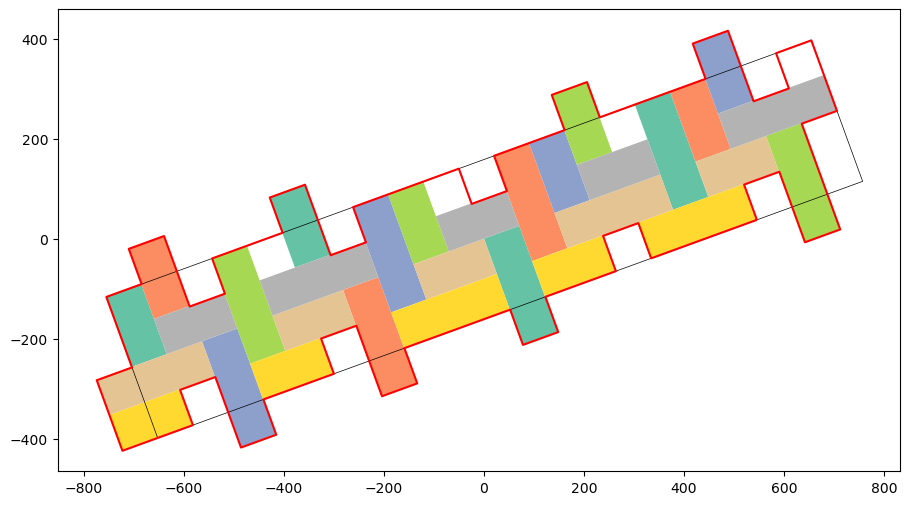

In [3]:
w1 = WeaveUnit(weave_type = "twill", n = 2, spacing = 75, aspect = 1,
               strands = "abcd-|efg-", crs = ak.crs).transform_rotate(20)
w1.plot(r = 0, cmap = "Set2", figsize = (18, 6), show_ids = False)

In [4]:
weave1 = Tiling(w1, ak)

/opt/miniconda3/envs/weaving/lib/python3.13/site-packages/shapely/constructive.py:996: RuntimeWarning: divide by zero encountered in oriented_envelope
  return lib.oriented_envelope(geometry, **kwargs)


In [5]:
# import copy

# tiles = copy.deepcopy(weave1.tiles)
# areas = copy.deepcopy(ak)

In [6]:
# tiles.geometry = tiles.centroid
# tiles["tileUID"] = range(tiles.shape[0])

In [7]:
# tiles.sjoin(areas, how = "inner")[["tileUID", "DZ2018"]]

In [8]:
textile1 = weave1.get_tiled_map(# prioritise_tiles = False, 
                                # ragged_edges = False, 
                                debug = True, rotation = 0)

STEP 1: prep data (rotation if requested): 0.001
STEP A2: overlay zones with tiling: 0.256
STEP A3: calculate areas: 0.001
STEP A4: drop columns prior to join: 0.000
STEP A5: build lookup for join: 0.011
STEP A6: perform lookup join: 0.006


In [9]:
textile1.variables = [x for x in ak.columns if "Rank" in x]
textile1.colourmaps = dict(zip(textile1.variables,
                               ("BrBG", "RdGy", "RdYlBu", "Spectral","PiYG", "PRGn", "PuOr")))

Only a list of variables specified, assigning to
            available tile_ids.


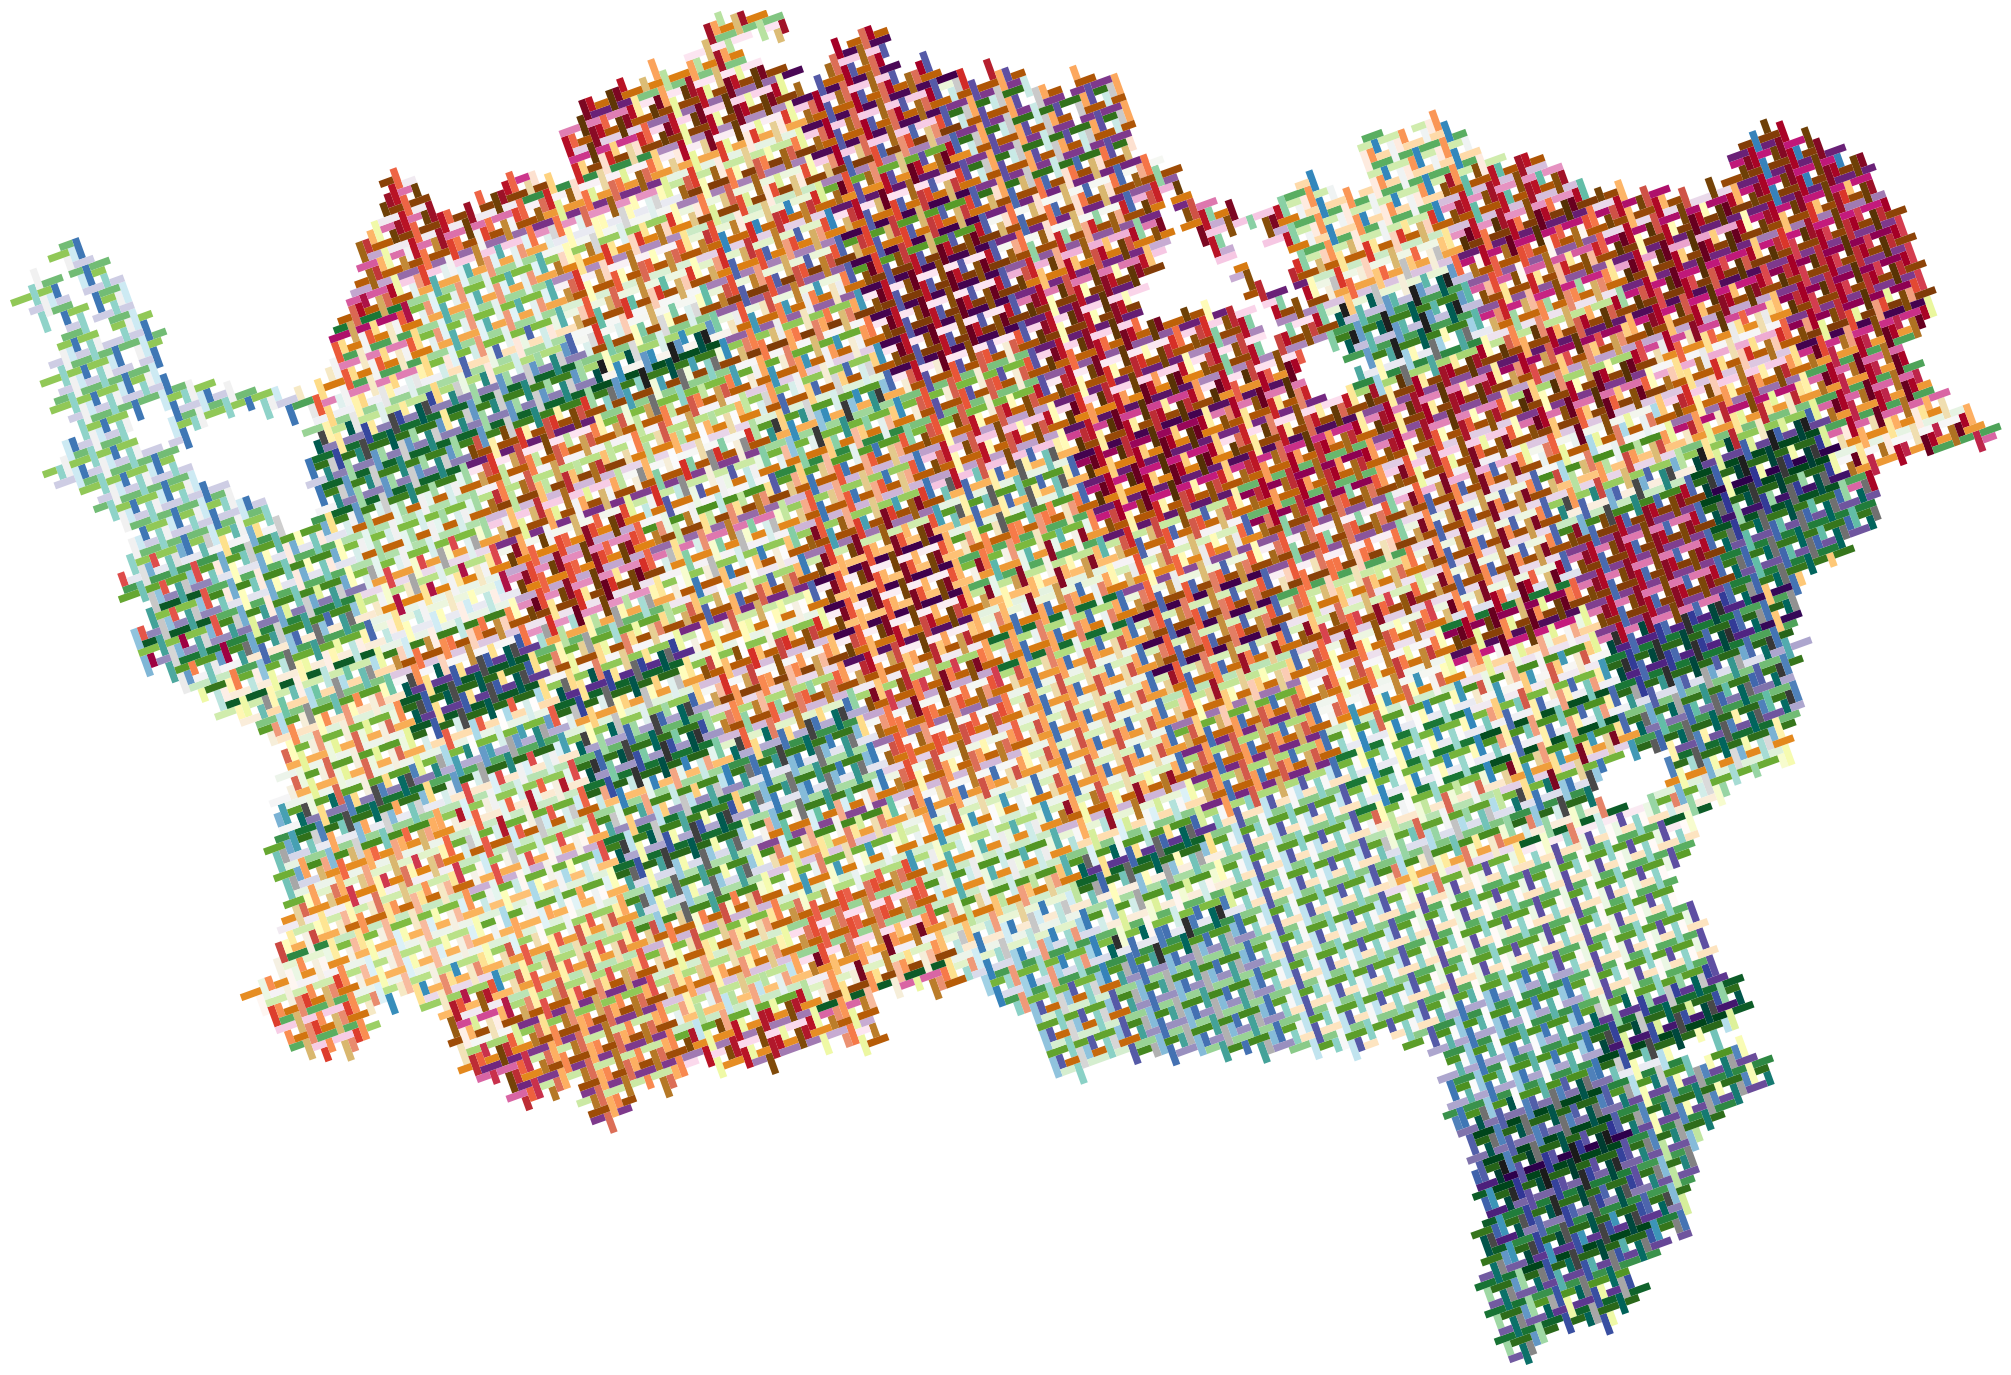

In [10]:
fig = textile1.render(legend = False)

### Exploring alternative steps prioritise tiling elements

In [11]:
import time

tiles = weave1.tiles
tiles.sindex
tiles["tileUID"] = range(tiles.shape[0])

ak.sindex

In [12]:
overlaps = tiles.sjoin(ak)

In [13]:
dups = overlaps.duplicated(subset = ["tileUID"])
mult_overlaps = overlaps.loc[list(dups), ["tile_id", "tileUID", "geometry"]]
mult_overlaps.sindex

In [14]:
overlap_areas = mult_overlaps.overlay(ak)
overlap_areas["area"] = overlap_areas.geometry.area

In [15]:
overlap_areas[["tileUID", "DZ2018", "area", "geometry"]]

,tileUID,DZ2018,area,geometry
0,1623,7601459,5598.515142,"POLYGON ((1766139.66 5920469.54, 1766069.183 5..."
1,1623,7601482,10556.349979,"POLYGON ((1766119.182 5920525.804, 1766082.451..."
2,1644,7601459,8971.220003,"POLYGON ((1766024.357 5920347.76, 1765953.881 ..."
3,1644,7601482,1570.798105,"POLYGON ((1765973.054 5920488.714, 1765980.132..."
4,1646,7601482,11.230061,"POLYGON ((1766658.65 5920578.624, 1766662.869 ..."
...,...,...,...,...
18633,29706,7600422,9742.502415,"POLYGON ((1751013.803 5911372.579, 1750966.716..."
18634,29710,7600394,125.313815,"POLYGON ((1750751.069 5911436.578, 1750756.344..."
18635,29710,7600422,4049.280278,"POLYGON ((1750798.55 5911294.233, 1750797.537 ..."
18636,29712,7600394,4081.072491,"POLYGON ((1751034.348 5911619.496, 1751078.622..."
